In [61]:
import pandas as pd

데이터 준비

In [62]:
fandom_edges = pd.read_csv('/content/drive/My Drive/Data Mining/데마 데이터/fandom_edges.csv')
fandom_edges

,source,target,jan_support,feb_support
0,000115sh,000115sh,0,1
1,000115sh,Jessica,15,0
2,000115sh,ahnhyungsub,30,1
3,000115sh,bigjaejun,13,0
4,000115sh,binhjleehjh,29,1
...,...,...,...,...
25898,yuseonho,yoonjisung,39,0
25899,yuseonho,yuseonho,62,32
25900,zico,fromis,1,0
25901,zico,kimsohee,1,0


In [63]:
# 자기 자신을 support하는 경우는 팬덤간 도움이 아니라고 판단하고 제거함
condition = (fandom_edges['source'] != fandom_edges['target'])
fandom_edges = fandom_edges[condition]
fandom_edges

,source,target,jan_support,feb_support
1,000115sh,Jessica,15,0
2,000115sh,ahnhyungsub,30,1
3,000115sh,bigjaejun,13,0
4,000115sh,binhjleehjh,29,1
5,000115sh,buzz,3,0
...,...,...,...,...
25897,yuseonho,yaomingming,0,3
25898,yuseonho,yoonjisung,39,0
25900,zico,fromis,1,0
25901,zico,kimsohee,1,0


In [64]:
fandom_meta = pd.read_json('/content/drive/My Drive/Data Mining/데마 데이터/fandom_meta.json')
fandom_meta

,fandom_name,chart_name,agent,year(debut),post_num
0,6kies,None,YG Entertainment,1997,293338
1,acejun,None,Beat Interactive,2017,2106
2,ahnhyungsub,None,Yuehua Entertainment,2017,98096
3,anyujin,IZ*ONE (아이즈원),Off The Record,2018,34362
4,aoa,AOA,FNC Entertainment,2012,39128
...,...,...,...,...,...
325,nflying,None,FNC Entertainment,2015,5876
326,parkdoha,None,Million Market,2016,1779
327,clc,None,Cube Entertainment,2015,8494
328,astromj,None,Fantagio Music,2016,1139


In [65]:
fandom_nodes = pd.read_csv('/content/drive/My Drive/Data Mining/데마 데이터/fandom_nodes.csv')
fandom_nodes

,fandom_id,fandom_name,jan_post,feb_post,type
0,000115sh,KIM SU-HYUN : 김수현(미스틱),1547,249,0
1,19980917,KIM DONG-HYUN / MXM : 김동현,3869,2853,1
2,2PM,2PM,1787,355,1
3,6kies,SECHSKIES : 젝스키스,49116,23535,1
4,Jessica,JESSICA : 제시카,1091,546,0
...,...,...,...,...,...
261,yoonjo,YOON JO / UNI.T : 윤조,1555,1358,0
262,yooyeonjung,YEONJUNG / WJSN (Cosmic Girls) : 유연정,4059,2670,0
263,youjung,CHOI YOOJUNG / Weki Meki : 최유정,9914,9340,0
264,yuseonho,YOO SEON-HO : 유선호,9849,4704,1


In [6]:
monthly_chart = pd.read_json('/content/drive/My Drive/Data Mining/데마 데이터/monthly_chart.json')
monthly_chart

,rank,title,artist,album,start,end
0,1,그날처럼,장덕철,그날처럼,201801,201801
1,2,instagram,DEAN,instagram,201801,201801
2,3,비행운,문문 (MoonMoon),LIFE IS BEAUTY FULL,201801,201801
3,4,선물,멜로망스,Moonlight,201801,201801
4,5,#첫사랑,볼빨간사춘기,#첫사랑,201801,201801
...,...,...,...,...,...,...
1195,96,I Was Born To Love You,Queen,Made In Heaven,201812,201812
1196,97,HandClap,Fitz & The Tantrums,Fitz and The Tantrums (Deluxe),201812,201812
1197,98,동화,멜로망스,The Fairy Tale,201812,201812
1198,99,Deeper,Wanna One (워너원),1¹¹=1 (POWER OF DESTINY),201812,201812


In [7]:
weekly_chart = pd.read_json('/content/drive/My Drive/Data Mining/데마 데이터/weekly_chart.json')
weekly_chart

,id,album,artist,rank,title,start,end
0,1,그날처럼,장덕철,1,그날처럼,2018-01-22 00:00:00,2018-01-28 00:00:00
1,2,주인공,선미,2,주인공,2018-01-22 00:00:00,2018-01-28 00:00:00
2,3,Faces of Love,수지 (SUZY),3,다른사람을 사랑하고 있어,2018-01-22 00:00:00,2018-01-28 00:00:00
3,4,#첫사랑,볼빨간사춘기,4,#첫사랑,2018-01-22 00:00:00,2018-01-28 00:00:00
4,5,LIFE IS BEAUTY FULL,문문 (MoonMoon),5,비행운,2018-01-22 00:00:00,2018-01-28 00:00:00
...,...,...,...,...,...,...,...
5895,5896,We Young,"찬열 (CHANYEOL), 세훈 (SEHUN)",96,We Young,2018-10-08 00:00:00,2018-10-14 00:00:00
5896,5897,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 트리플포지션,97,캥거루 (Kangaroo) (Prod. ZICO),2018-10-08 00:00:00,2018-10-14 00:00:00
5897,5898,연애플레이리스트3 Part.2,김민석,98,너에게,2018-10-08 00:00:00,2018-10-14 00:00:00
5898,5899,TRAVEL: NOAH,HAON (김하온),99,"NOAH (Feat. 박재범, Hoody)",2018-10-08 00:00:00,2018-10-14 00:00:00


1 - 1)

In [393]:
# 1 - 1)
팬덤사이의_전체_도움수 = fandom_edges['jan_support'].values.sum() + fandom_edges['feb_support'].values.sum()
팬덤사이의_전체_도움수

763968

In [394]:
팬덤들의_전체_활동수 = fandom_nodes['jan_post'].values.sum() + fandom_nodes['feb_post'].values.sum()
팬덤들의_전체_활동수

3681780

In [395]:
print(f"{팬덤사이의_전체_도움수 / 팬덤들의_전체_활동수 * 100:.2f}%")

20.75%


1 - 2)

In [39]:
# 1 - 2)
top_10_source = {}
for i in range(len(fandom_edges)):
  name = fandom_edges.iloc[i].source
  top_10_source[name] = top_10_source.get(name, 0) + fandom_edges.iloc[i]['jan_support'] + fandom_edges.iloc[i]['feb_support']  
top_10_source = sorted(top_10_source.items(), reverse=True, key = lambda k : k[1])

In [40]:
from pprint import pprint
# pprint(top_10_source[:10])
for i in top_10_source[:10]:
  print(i[0], '|',fandom_nodes[fandom_nodes['fandom_id'] == i[0]]['fandom_name'].values[0], '|',i[1])

kim | Samuel / Samuel : 김사무엘 | 15171
jbj | JBJ | 14900
girllaboum | Laboum : 라붐 | 12053
ohmygirl | Oh My Girl : 오마이걸 | 11655
leejunyoung | LEE JUN-YOUNG / UNB : 이준영 | 11559
woojinyoung | WOO JIN-YOUNG / HNB : 우진영 | 11473
chungha | CHUNGHA / I.O.I : 김청하 | 11457
highlight | Highlight : 하이라이트 | 11002
leesoomin | LEE SOO-MIN : 보컬 이수민 | 10787
infinite | Infinite : 인피니트 | 10781


In [41]:
top_10_target = {}
for i in range(len(fandom_edges)):
  name = fandom_edges.iloc[i].target
  top_10_target[name] = top_10_target.get(name, 0) + fandom_edges.iloc[i]['jan_support'] + fandom_edges.iloc[i]['feb_support']  
top_10_target = sorted(top_10_target.items(), reverse=True, key = lambda k : k[1])

In [42]:
# pprint(top_10_target[:10])
for i in top_10_target[:10]:
  print(i[0], '|',fandom_nodes[fandom_nodes['fandom_id'] == i[0]]['fandom_name'].values[0], '|',i[1])

kim | Samuel / Samuel : 김사무엘 | 21701
jbj | JBJ | 19724
leejunyoung | LEE JUN-YOUNG / UNB : 이준영 | 17994
leesoomin | LEE SOO-MIN : 보컬 이수민 | 14589
jungsewoon | JEONG SE-WOON : 정세운 | 14586
girllaboum | Laboum : 라붐 | 14508
mkyunghoon | MIN KYUNG-HOON / Buzz : 민경훈 | 13453
dongho | BAEK-HO / NU'EST W : 강동호 (백호) | 13325
ohmygirl | Oh My Girl : 오마이걸 | 13228
highlight | Highlight : 하이라이트 | 12143


2 - 1)

In [43]:
#2 - 1)
# 팬덤 이름, 팬덤 활동 수, 도움을 주고받는 수 이거를 구해야겠다
name_target = {}
for name, num in top_10_target:
  name_target[name] = num
#pprint(name_target)
print(len(name_target))
name_source = {}
for name, num in top_10_source:
  name_source[name] = num
#pprint(name_source)
print(len(name_source))

243
245


In [44]:
dic = {}
for i in range(len(fandom_nodes)):
  dic[fandom_nodes.iloc[i].fandom_id] = fandom_nodes.iloc[i].jan_post + fandom_nodes.iloc[i].feb_post
# pprint(dic)
name_target = pd.Series(name_target)
name_source = pd.Series(name_source)
dic = pd.Series(dic)
new_df = pd.DataFrame({
    'source': name_source,
    'target': name_target,
    '활동 수': dic
})
new_df = new_df.sort_values('활동 수')
import numpy as np
new_df['source'].fillna(0, inplace=True)
new_df['target'].fillna(0, inplace=True)
new_df 

,source,target,활동 수
kojimamako,0.0,0.0,1
redvelvet,0.0,8.0,1
fromis,0.0,9524.0,1
shinsuhyeon,0.0,0.0,1
sonamoo,0.0,8332.0,1
...,...,...,...
redvelvetreveluv,8938.0,6201.0,139881
apink,2153.0,321.0,149491
wannaone,5017.0,10619.0,173513
lovelyz,5193.0,5907.0,267502


In [45]:
from scipy.stats import pearsonr
pearsonr(new_df['활동 수'].values, new_df.source.values)

(0.3001092760274402, 6.132087481111727e-07)

In [46]:
pearsonr(new_df['활동 수'].values, new_df.target.values)

(0.32523749478482566, 5.7064658611430096e-08)

In [ ]:
"""
보통 Pearson correlation coefficient가
음수이면 음의 상관관계, 양수이면 양의 상관관계이다
0.1과 0.3 사이면 약한 양의 상관관계,
0.3과 0.7사이이면 뚜렷한 양의 상관관계라고 보기 때문에
0.32, 0.33은 어느정도 유의미한 양의 상관관계를 지녔다고 볼 수 있다.
또한 p-value값이 0.05보다 작으면 두 피처의 상관관게가 없다는 Null hypothesis를 reject하는데,
p-value값이 거의 0에 근접할 정도로 굉장히 작기 때문에
상관관계가 충분히 있다고 결론지을 수 있다.
"""

2 - 2)

In [47]:
from scipy.stats import spearmanr
spearmanr(new_df['활동 수'].values, new_df.source.values)

SpearmanrResult(correlation=0.7560164100375947, pvalue=1.660936053967619e-50)

In [48]:
spearmanr(new_df['활동 수'].values, new_df.target.values)

SpearmanrResult(correlation=0.6298958772451408, pvalue=8.182189266558073e-31)

In [ ]:
"""
통계에서 스피어만 상관 계수는 두 변수 의 순위 사이의 통계적 의존성을 측정하는 비모수적인 척도이다.
이는 두 변수의 관계가 단조 함수를 사용하여 얼마나 잘 설명될 수 있는지를 평가한다.
Pearson으로 측정하였을 때에는 도움을 받는 수가 상대적으로 상관관계가 더 있다고 나왔는데, 
Spearman으로 측정하였을 때에는 도움을 주는 수가 더 상관관계가 있다는 결론이 나온다. 
또한 도움을 주는것과 받는 것 모두 Spearman으로 측정했을 때 양의 상관관계가 더욱 강하다.
"""

3 - 1) (1월)


In [75]:
import networkx as nx
g1 = nx.DiGraph(fandom_edges.loc[:, ('source', 'target')].values.tolist())

In [76]:
%%time
edge_weight_list = [(fandom_edges.iloc[i].source, fandom_edges.iloc[i].target, fandom_edges.iloc[i].jan_support) for i in range(len(fandom_edges))]

CPU times: user 12.6 s, sys: 10.3 ms, total: 12.6 s
Wall time: 12.6 s


In [77]:
sorted_weight = sorted(edge_weight_list, key = lambda k : k[2], reverse = True)
one_percent = int(len(sorted_weight) / 100)
one_percent_weight = sorted_weight[:one_percent]

In [78]:
dic = {}
for f, t, w in one_percent_weight:
  dic[(f, t)] = True

In [79]:
delete_list = []
for f, t, w in edge_weight_list:
  if not dic.get((f, t), False):
    delete_list.append((f, t))
len(delete_list)

25512

In [80]:
g1.add_weighted_edges_from(sorted_weight[:one_percent])

In [81]:
nx.set_node_attributes(g1, fandom_nodes.set_index('fandom_id')['type'], 'sex')

In [82]:
nx.set_node_attributes(g1, fandom_meta.set_index('fandom_name')['agent'], 'agent')

In [83]:
g1.remove_edges_from(delete_list)

In [17]:
g1.degree

DiDegreeView({'000115sh': 0, 'Jessica': 0, 'ahnhyungsub': 3, 'bigjaejun': 0, 'binhjleehjh': 3, 'buzz': 1, 'cmg': 1, 'cosmicgirl': 0, 'daewon': 0, 'dmlwlsska': 5, 'doitamazing7': 7, 'dongho': 21, 'feeldog': 0, 'fortediquattro': 0, 'fromis': 0, 'girllaboum': 12, 'gooddayjiwon': 4, 'guckkasten': 4, 'gunmin': 0, 'gx9': 1, 'hby': 0, 'hotshot': 7, 'imfactaeho': 5, 'imhangyeol': 0, 'jaejoong': 9, 'jbj': 35, 'jdh': 1, 'jihansol': 0, 'jinseongho': 39, 'jjp': 0, 'jongshin': 0, 'joohaknyeon': 0, 'jsh': 0, 'jungchaeyeon': 0, 'junsu': 1, 'kantoz': 3, 'kim': 27, 'kimbowon': 2, 'kimbyunggwan': 0, 'kimhyojin': 0, 'kimsejeong': 0, 'kimseyun': 1, 'kimsohee': 2, 'kimtaemin': 0, 'leedonghun': 0, 'leehyunjoo': 1, 'leejungha': 0, 'leejunyoung': 21, 'leesoomin': 22, 'matilda': 0, 'mino0330': 1, 'mkyunghoon': 6, 'mxmymdh': 5, 'namyujin': 1, 'nojisun': 0, 'ohmygirl': 18, 'onf': 1, 'paka': 2, 'parkhyeonjin': 3, 'parkjeup': 2, 'pentagon': 4, 'pledis': 0, 'rainz': 7, 'rbwdongmyeong': 0, 'romeo': 0, 'romeohyunkyun

In [31]:
x_axis = []
y_axis = [0]
for i, j in enumerate(g1.degree):
  x_axis.append(i)
  y_axis.append(y_axis[-1] + j[1])
y_axis.pop(0)
n = y_axis[-1]
len(x_axis), len(y_axis), x_axis[-1], y_axis[-1]

(252, 252, 251, 514)

514


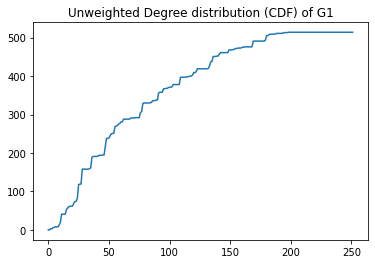

In [32]:
import matplotlib.pyplot as plt
y_axis = [i for i in y_axis]
plt.plot(x_axis, y_axis)
plt.title('Unweighted Degree distribution (CDF) of G1')
print(y_axis[-1])
plt.show()

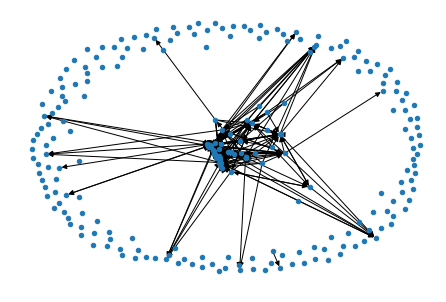

In [418]:
nx.draw(g1, with_labels=False, node_size=20)

3 - 2) (1월)

In [452]:
# weight 고려 안할때
print(*sorted(g1.in_degree, key = lambda k : k[1], reverse=True)[:10])

('jinseongho', 27) ('dongho', 19) ('jbj', 19) ('kim', 15) ('kimjaehwan', 14) ('leejunyoung', 13) ('leesoomin', 12) ('wannaone', 12) ('wartortle', 12) ('winkgall', 12)


In [450]:
print(*sorted(g1.out_degree, key = lambda k : k[1], reverse=True)[:10])

('woojinyoung', 19) ('jbj', 16) ('ohmygirl', 15) ('jinseongho', 12) ('kim', 12) ('leesoomin', 10) ('chungha', 10) ('girllaboum', 9) ('jungsewoon', 9) ('leejunyoung', 8)


In [421]:
# weight를 고려할 때
in_df = fandom_edges.sort_values('jan_support', ascending=False)
in_df[:10]

,source,target,jan_support,feb_support
18039,ohmygirl,twice,483,50
15258,leejunyoung,leesoomin,450,123
6317,girllaboum,leejunyoung,401,146
7012,gooddayjiwon,leejunyoung,377,118
24860,woojinyoung,kimjaehwan,374,44
15460,leesoomin,leejunyoung,345,62
7013,gooddayjiwon,leesoomin,339,76
24951,woojinyoung,winkgall,332,23
16694,mxmymdh,jungsewoon,327,0
10186,jinseongho,kdani,322,12


3 - 3) (1월)

In [422]:
# 3 - 3)
g1.nodes.data()

NodeDataView({'000115sh': {'sex': 0, 'agent': 'Mystic Entertainment'}, 'Jessica': {'sex': 0, 'agent': 'Coridel Entertainment'}, 'ahnhyungsub': {'sex': 1, 'agent': 'Yuehua Entertainment'}, 'bigjaejun': {'sex': 1, 'agent': 'Banana Culture'}, 'binhjleehjh': {'sex': 1, 'agent': 'LIVEWORKS COMPANY'}, 'buzz': {'sex': 1, 'agent': 'Santa Music'}, 'cmg': {'sex': 1, 'agent': 'PLEDIS Entertainment'}, 'cosmicgirl': {'sex': 0, 'agent': 'Starship Entertainment, Yuehua Entertainment'}, 'daewon': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'dmlwlsska': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'doitamazing7': {'sex': 0, 'agent': 'MBK Entertainment'}, 'dongho': {'sex': 1, 'agent': 'PLEDIS Entertainment'}, 'feeldog': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'fortediquattro': {'sex': 1, 'agent': 'Arts & Artists'}, 'fromis': {'sex': 0, 'agent': 'Off The Record'}, 'girllaboum': {'sex': 0, 'agent': 'Global H Media'}, 'gooddayjiwon': {'sex': 0, 'agent': 'C9 Ente

In [423]:
g1.edges.data()

OutEdgeDataView([('binhjleehjh', 'dongho', {'weight': 163}), ('binhjleehjh', 'jungsewoon', {'weight': 149}), ('binhjleehjh', 'winkgall', {'weight': 138}), ('buzz', 'mkyunghoon', {'weight': 155}), ('cmg', 'jinseongho', {'weight': 206}), ('dmlwlsska', 'jaejoong', {'weight': 150}), ('dmlwlsska', 'kimjaehwan', {'weight': 150}), ('dmlwlsska', 'leesoomin', {'weight': 186}), ('doitamazing7', 'dongho', {'weight': 245}), ('doitamazing7', 'jbj', {'weight': 144}), ('doitamazing7', 'kim', {'weight': 159}), ('doitamazing7', 'leejunyoung', {'weight': 241}), ('doitamazing7', 'leesoomin', {'weight': 185}), ('doitamazing7', 'vikon', {'weight': 150}), ('dongho', 'girllaboum', {'weight': 155}), ('dongho', 'jinseongho', {'weight': 220}), ('girllaboum', 'dongho', {'weight': 296}), ('girllaboum', 'hotshot', {'weight': 188}), ('girllaboum', 'jaejoong', {'weight': 164}), ('girllaboum', 'kim', {'weight': 187}), ('girllaboum', 'leejunyoung', {'weight': 401}), ('girllaboum', 'leesoomin', {'weight': 218}), ('girl

In [424]:
btb = btg = gtb = gtg = total = 0
for a in g1.edges:
  f, t = a
  from_s = g1.nodes[f]['sex']
  to_s = g1.nodes[t]['sex']
  if from_s == 0:
    if to_s == 0:
      gtg += 1
    else:
      gtb += 1
  else:
    if to_s == 0:
      btg += 1
    else:
      btb += 1
  total += 1
btb, btg, gtb, gtg, total

(138, 26, 66, 27, 257)

In [425]:
s1 = {'boy -> boy': btb/total * 100, 'boy -> girl': btg/total * 100, 'girl -> boy': gtb/total * 100, 'girl -> girl': gtg/total * 100}
s1 = pd.Series(s1)
s1

boy -> boy      53.696498
boy -> girl     10.116732
girl -> boy     25.680934
girl -> girl    10.505837
dtype: float64

In [426]:
print(f"boy -> boy   {btb/total * 100:.2f}%")
print(f"boy -> girl  {btg/total * 100:.2f}%")
print(f"girl -> boy  {gtb/total * 100:.2f}%")
print(f"girl -> girl {gtg/total * 100:.2f}%")

boy -> boy   53.70%
boy -> girl  10.12%
girl -> boy  25.68%
girl -> girl 10.51%


In [427]:
# weight 고려 했을 때
btb = btg = gtb = gtg = total = 0
for a in g1.edges:
  f, t = a
  w = g1.edges[a]['weight']
  from_s = g1.nodes[f]['sex']
  to_s = g1.nodes[t]['sex']
  if from_s == 0:
    if to_s == 0:
      gtg += w
    else:
      gtb += w
  else:
    if to_s == 0:
      btg += w
    else:
      btb += w
  total += w
btb, btg, gtb, gtg, total

(25846, 4579, 12130, 5538, 48093)

In [428]:
print(f"boy -> boy   {btb/total * 100:.2f}%")
print(f"boy -> girl  {btg/total * 100:.2f}%")
print(f"girl -> boy  {gtb/total * 100:.2f}%")
print(f"girl -> girl {gtg/total * 100:.2f}%")

boy -> boy   53.74%
boy -> girl  9.52%
girl -> boy  25.22%
girl -> girl 11.52%


In [429]:
s2 = {'boy -> boy': btb/total * 100, 'boy -> girl': btg/total * 100, 'girl -> boy': gtb/total * 100, 'girl -> girl': gtg/total * 100}
s2 = pd.Series(s2)

In [430]:
three = pd.DataFrame({'not weighted': s1, 'weighted': s2})
three

,not weighted,weighted
boy -> boy,53.696498,53.741709
boy -> girl,10.116732,9.521136
girl -> boy,25.680934,25.221966
girl -> girl,10.505837,11.515189


3 - 4) (1월)

In [473]:
pd.DataFrame(fandom_meta['agent'].value_counts())

,agent
Off The Record,19
SM Entertainment,19
AKS,18
JYP Entertainment,17
YG Entertainment,16
...,...
The Black Label,1
Global H Media,1
Ilgwang Polaris,1
LABEL LIM,1


In [474]:
dic = {}
for a in g1.edges:
  f, t = a
  agent1 = fandom_meta[fandom_meta['fandom_name'] == f]['agent'].values[0]
  agent2 = fandom_meta[fandom_meta['fandom_name'] == t]['agent'].values[0]
  if dic.get((agent1, agent2), -1) == -1:
    dic[(agent1, agent2)] = g1.edges[a]['weight']
  else:
    dic[(agent1, agent2)] += g1.edges[a]['weight']

In [475]:
len(dic), print(dic)

{('LIVEWORKS COMPANY', 'PLEDIS Entertainment'): 677, ('LIVEWORKS COMPANY', 'Starship Entertainment'): 149, ('LIVEWORKS COMPANY', 'Swing Entertainment'): 1578, ('Santa Music', 'Santa Music'): 155, ('PLEDIS Entertainment', 'LIVEWORKS COMPANY'): 884, ('The Unit Culture Industry Company', 'C-JeS Entertainment'): 150, ('The Unit Culture Industry Company', 'Swing Entertainment'): 661, ('The Unit Culture Industry Company', 'Mystic Entertainment'): 636, ('MBK Entertainment', 'PLEDIS Entertainment'): 245, ('MBK Entertainment', 'Fave Entertainment'): 144, ('MBK Entertainment', 'Brave Entertainment'): 159, ('MBK Entertainment', 'The Unit Culture Industry Company'): 241, ('MBK Entertainment', 'Mystic Entertainment'): 185, ('MBK Entertainment', 'YG Entertainment'): 150, ('PLEDIS Entertainment', 'Global H Media'): 155, ('Global H Media', 'PLEDIS Entertainment'): 481, ('Global H Media', 'Star Crew Entertainment'): 188, ('Global H Media', 'C-JeS Entertainment'): 164, ('Global H Media', 'Brave Entertai

(193, None)

In [476]:
sorted(dic.items(), key = lambda k : k[1], reverse=True)[:10]

[(('LIVEWORKS COMPANY', 'Swing Entertainment'), 1578),
 (('Happy Face Entertainment', 'Swing Entertainment'), 1560),
 (('Fave Entertainment', 'Swing Entertainment'), 995),
 (('PLEDIS Entertainment', 'LIVEWORKS COMPANY'), 884),
 (('WM Entertainment', 'Swing Entertainment'), 847),
 (('YG Entertainment', 'LIVEWORKS COMPANY'), 832),
 (('Mystic Entertainment', 'Swing Entertainment'), 800),
 (('LIVEWORKS COMPANY', 'PLEDIS Entertainment'), 677),
 (('The Unit Culture Industry Company', 'Swing Entertainment'), 661),
 (('The Unit Culture Industry Company', 'Mystic Entertainment'), 636)]

In [477]:
s = sum(dic.values())
s

48093

In [478]:
f1 = {}
f2 = {}
c = 0
for i, j in sorted(dic.items(), key = lambda k : k[1], reverse=True)[:10]:
  f1[c] = i
  f2[c] = j/s * 100
  print(f"{i[0]} -> {i[1]} 의 비율은 {j/s * 100:.2f}% 입니다")
  c+=1

LIVEWORKS COMPANY -> Swing Entertainment 의 비율은 3.28% 입니다
Happy Face Entertainment -> Swing Entertainment 의 비율은 3.24% 입니다
Fave Entertainment -> Swing Entertainment 의 비율은 2.07% 입니다
PLEDIS Entertainment -> LIVEWORKS COMPANY 의 비율은 1.84% 입니다
WM Entertainment -> Swing Entertainment 의 비율은 1.76% 입니다
YG Entertainment -> LIVEWORKS COMPANY 의 비율은 1.73% 입니다
Mystic Entertainment -> Swing Entertainment 의 비율은 1.66% 입니다
LIVEWORKS COMPANY -> PLEDIS Entertainment 의 비율은 1.41% 입니다
The Unit Culture Industry Company -> Swing Entertainment 의 비율은 1.37% 입니다
The Unit Culture Industry Company -> Mystic Entertainment 의 비율은 1.32% 입니다


In [479]:
four = pd.DataFrame({'(from, to)': f1, 'Ratio': f2})
four

,"(from, to)",Ratio
0,"(LIVEWORKS COMPANY, Swing Entertainment)",3.281143
1,"(Happy Face Entertainment, Swing Entertainment)",3.243715
2,"(Fave Entertainment, Swing Entertainment)",2.068908
3,"(PLEDIS Entertainment, LIVEWORKS COMPANY)",1.838105
4,"(WM Entertainment, Swing Entertainment)",1.761171
5,"(YG Entertainment, LIVEWORKS COMPANY)",1.729981
6,"(Mystic Entertainment, Swing Entertainment)",1.663444
7,"(LIVEWORKS COMPANY, PLEDIS Entertainment)",1.407689
8,"(The Unit Culture Industry Company, Swing Ente...",1.374420
9,"(The Unit Culture Industry Company, Mystic Ent...",1.322438


3 - 1) (2월)

In [24]:
# g2에 대해서도 다 똑같이 진행
import networkx as nx
g2 = nx.DiGraph(fandom_edges.loc[:, ('source', 'target')].values.tolist())

In [25]:
edge_weight_list = [(fandom_edges.iloc[i].source, fandom_edges.iloc[i].target, fandom_edges.iloc[i].feb_support) for i in range(len(fandom_edges))]

sorted_weight = sorted(edge_weight_list, key = lambda k : k[2], reverse = True)
one_percent = int(len(sorted_weight) / 100)
one_percent_weight = sorted_weight[:one_percent]

dic = {}
for f, t, w in one_percent_weight:
  dic[(f, t)] = True

delete_list = []
for f, t, w in edge_weight_list:
  if not dic.get((f, t), False):
    delete_list.append((f, t))

g2.add_weighted_edges_from(sorted_weight[:one_percent])

In [26]:
nx.set_node_attributes(g2, fandom_nodes.set_index('fandom_id')['type'], 'sex')
nx.set_node_attributes(g2, fandom_meta.set_index('fandom_name')['agent'], 'agent')
g2.remove_edges_from(delete_list)

In [27]:
len(g2.nodes), len(g2.edges)

(252, 257)

In [28]:
g2.nodes.data()

NodeDataView({'000115sh': {'sex': 0, 'agent': 'Mystic Entertainment'}, 'Jessica': {'sex': 0, 'agent': 'Coridel Entertainment'}, 'ahnhyungsub': {'sex': 1, 'agent': 'Yuehua Entertainment'}, 'bigjaejun': {'sex': 1, 'agent': 'Banana Culture'}, 'binhjleehjh': {'sex': 1, 'agent': 'LIVEWORKS COMPANY'}, 'buzz': {'sex': 1, 'agent': 'Santa Music'}, 'cmg': {'sex': 1, 'agent': 'PLEDIS Entertainment'}, 'cosmicgirl': {'sex': 0, 'agent': 'Starship Entertainment, Yuehua Entertainment'}, 'daewon': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'dmlwlsska': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'doitamazing7': {'sex': 0, 'agent': 'MBK Entertainment'}, 'dongho': {'sex': 1, 'agent': 'PLEDIS Entertainment'}, 'feeldog': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'fortediquattro': {'sex': 1, 'agent': 'Arts & Artists'}, 'fromis': {'sex': 0, 'agent': 'Off The Record'}, 'girllaboum': {'sex': 0, 'agent': 'Global H Media'}, 'gooddayjiwon': {'sex': 0, 'agent': 'C9 Ente

In [443]:
g2.edges.data()

OutEdgeDataView([('ahnhyungsub', 'jbj', {'weight': 122}), ('ahnhyungsub', 'kim', {'weight': 100}), ('buzz', 'jsh', {'weight': 115}), ('buzz', 'kim', {'weight': 89}), ('buzz', 'mkyunghoon', {'weight': 99}), ('cmg', 'jsh', {'weight': 99}), ('cosmicgirl', 'chungha', {'weight': 126}), ('cosmicgirl', 'jungsewoon', {'weight': 142}), ('cosmicgirl', 'kim', {'weight': 132}), ('cosmicgirl', 'kimjaehwan', {'weight': 94}), ('cosmicgirl', 'lovelyz', {'weight': 102}), ('cosmicgirl', 'ohmygirl', {'weight': 100}), ('cosmicgirl', 'vikon', {'weight': 100}), ('cosmicgirl', 'wannaone', {'weight': 100}), ('cosmicgirl', 'wartortle', {'weight': 118}), ('cosmicgirl', 'winkgall', {'weight': 88}), ('dmlwlsska', 'dongho', {'weight': 129}), ('dmlwlsska', 'kdani', {'weight': 89}), ('dmlwlsska', 'wannaone', {'weight': 92}), ('dmlwlsska', 'winkgall', {'weight': 102}), ('doitamazing7', 'chungha', {'weight': 91}), ('doitamazing7', 'nuestminhyun', {'weight': 102}), ('doitamazing7', 'ohmygirl', {'weight': 103}), ('dongh

514


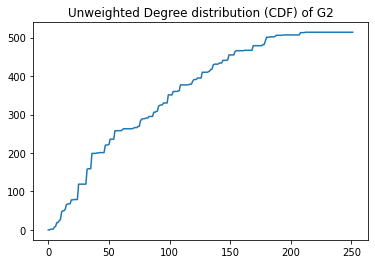

In [33]:
x_axis = []
y_axis = [0]
for i, j in enumerate(g2.degree):
  x_axis.append(i)
  y_axis.append(y_axis[-1] + j[1])
y_axis.pop(0)
n = y_axis[-1]

import matplotlib.pyplot as plt
y_axis = [i for i in y_axis]
plt.plot(x_axis, y_axis)
plt.title('Unweighted Degree distribution (CDF) of G2')
print(y_axis[-1])
plt.show()

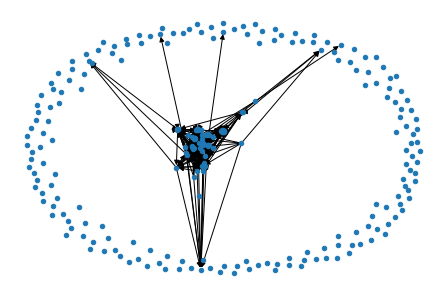

In [ ]:
nx.draw(g2, with_labels=False, node_size=20)

3 - 2) (2월)

In [466]:
# weight 고려 안할때
print(*sorted(g2.in_degree, key = lambda k : k[1], reverse=True)[:10])

('kim', 29) ('jbj', 26) ('ohmygirl', 21) ('jsh', 19) ('dongho', 15) ('leejunyoung', 12) ('jungsewoon', 12) ('kimjaehwan', 12) ('wannaone', 11) ('kdani', 11)


In [318]:
sorted(g2.out_degree, key = lambda k : k[1], reverse=True)[:10]

[('jsh', 20),
 ('highlight', 18),
 ('jbj', 14),
 ('kim', 11),
 ('april', 11),
 ('redvelvetreveluv', 11),
 ('cosmicgirl', 10),
 ('gx9', 9),
 ('mkyunghoon', 9),
 ('infinite', 9)]

In [471]:
print("1월의 in-degree: ",*sorted(g1.in_degree, key = lambda k : k[1], reverse=True)[:10],'\n')
print("1월의 out-degree: ",*sorted(g1.out_degree, key = lambda k : k[1], reverse=True)[:10],'\n') 
print("2월의 in-degree: ",*sorted(g2.in_degree, key = lambda k : k[1], reverse=True)[:10],'\n')
print("2월의 out-degree: ",*sorted(g2.out_degree, key = lambda k : k[1], reverse=True)[:10])

1월의 in-degree:  ('jinseongho', 27) ('dongho', 19) ('jbj', 19) ('kim', 15) ('kimjaehwan', 14) ('leejunyoung', 13) ('leesoomin', 12) ('wannaone', 12) ('wartortle', 12) ('winkgall', 12) 

1월의 out-degree:  ('woojinyoung', 19) ('jbj', 16) ('ohmygirl', 15) ('jinseongho', 12) ('kim', 12) ('leesoomin', 10) ('chungha', 10) ('girllaboum', 9) ('jungsewoon', 9) ('leejunyoung', 8) 

2월의 in-degree:  ('kim', 29) ('jbj', 26) ('ohmygirl', 21) ('jsh', 19) ('dongho', 15) ('leejunyoung', 12) ('jungsewoon', 12) ('kimjaehwan', 12) ('wannaone', 11) ('kdani', 11) 

2월의 out-degree:  ('jsh', 20) ('highlight', 18) ('jbj', 14) ('kim', 11) ('april', 11) ('redvelvetreveluv', 11) ('cosmicgirl', 10) ('gx9', 9) ('mkyunghoon', 9) ('infinite', 9)


In [472]:
# weight를 고려할 때
in_df = fandom_edges.sort_values('feb_support', ascending=False)
in_df[:10]

,source,target,jan_support,feb_support
8156,hotshot,nebula,261,266
7944,highlight,kim,123,235
10885,jsh,wannaone,33,235
7929,highlight,jbj,140,222
5666,feeldog,kim,115,217
4418,day6,jungsewoon,74,216
9472,jbj,dongho,183,209
1267,april,ohmygirl,93,202
19930,redvelvetreveluv,ohmygirl,88,197
10802,jsh,kim,64,187


3 - 3) (2월)

In [320]:
btb = btg = gtb = gtg = total = 0
for a in g2.edges:
  f, t = a
  from_s = g2.nodes[f]['sex']
  to_s = g2.nodes[t]['sex']
  if from_s == 0:
    if to_s == 0:
      gtg += 1
    else:
      gtb += 1
  else:
    if to_s == 0:
      btg += 1
    else:
      btb += 1
  total += 1
print(f"boy -> boy   {btb/total * 100:.2f}%")
print(f"boy -> girl  {btg/total * 100:.2f}%")
print(f"girl -> boy  {gtb/total * 100:.2f}%")
print(f"girl -> girl {gtg/total * 100:.2f}%")
s1 = {'boy -> boy': btb/total * 100, 'boy -> girl': btg/total * 100, 'girl -> boy': gtb/total * 100, 'girl -> girl': gtg/total * 100}
s1 = pd.Series(s1)
s1

boy -> boy   52.53%
boy -> girl  14.01%
girl -> boy  21.79%
girl -> girl 11.67%


boy -> boy      52.529183
boy -> girl     14.007782
girl -> boy     21.789883
girl -> girl    11.673152
dtype: float64

In [321]:
# weight 고려 했을 때
btb = btg = gtb = gtg = total = 0
for a in g2.edges:
  f, t = a
  w = g2.edges[a]['weight']
  from_s = g2.nodes[f]['sex']
  to_s = g2.nodes[t]['sex']
  if from_s == 0:
    if to_s == 0:
      gtg += w
    else:
      gtb += w
  else:
    if to_s == 0:
      btg += w
    else:
      btb += w
  total += w
print(f"boy -> boy   {btb/total * 100:.2f}%")
print(f"boy -> girl  {btg/total * 100:.2f}%")
print(f"girl -> boy  {gtb/total * 100:.2f}%")
print(f"girl -> girl {gtg/total * 100:.2f}%")
s2 = {'boy -> boy': btb/total * 100, 'boy -> girl': btg/total * 100, 'girl -> boy': gtb/total * 100, 'girl -> girl': gtg/total * 100}
s2 = pd.Series(s2)

boy -> boy   55.05%
boy -> girl  12.73%
girl -> boy  20.35%
girl -> girl 11.87%


In [322]:
three = pd.DataFrame({'not weighted': s1, 'weighted': s2})
three

,not weighted,weighted
boy -> boy,52.529183,55.053958
boy -> girl,14.007782,12.732087
girl -> boy,21.789883,20.346538
girl -> girl,11.673152,11.867417


3 - 4) (2월)

In [246]:
pd.DataFrame(fandom_meta['agent'].value_counts())

,agent
Off The Record,19
SM Entertainment,19
AKS,18
JYP Entertainment,17
YG Entertainment,16
...,...
The Black Label,1
Global H Media,1
Ilgwang Polaris,1
LABEL LIM,1


In [480]:
dic = {}
for a in g2.edges:
  f, t = a
  agent1 = fandom_meta[fandom_meta['fandom_name'] == f]['agent'].values[0]
  agent2 = fandom_meta[fandom_meta['fandom_name'] == t]['agent'].values[0]
  if dic.get((agent1, agent2), -1) == -1:
    dic[(agent1, agent2)] = g2.edges[a]['weight']
  else:
    dic[(agent1, agent2)] += g2.edges[a]['weight']

s = sum(dic.values())

f1 = {}
f2 = {}
c = 0
for i, j in sorted(dic.items(), key = lambda k : k[1], reverse=True)[:10]:
  f1[c] = i
  f2[c] = j/s * 100
  print(f"{i[0]} -> {i[1]} 의 비율은 {j/s * 100:.2f}% 입니다")
  c+=1

The Unit Culture Industry Company -> Swing Entertainment 의 비율은 2.64% 입니다
Antenna -> Swing Entertainment 의 비율은 2.49% 입니다
Around US Entertainment -> Swing Entertainment 의 비율은 2.04% 입니다
Antenna -> PLEDIS Entertainment 의 비율은 1.93% 입니다
Fave Entertainment -> Swing Entertainment 의 비율은 1.82% 입니다
Santa Music -> Swing Entertainment 의 비율은 1.49% 입니다
SM Entertainment -> Swing Entertainment 의 비율은 1.45% 입니다
PLEDIS Entertainment -> Antenna 의 비율은 1.35% 입니다
Swing Entertainment -> The Unit Culture Industry Company 의 비율은 1.33% 입니다
Around US Entertainment -> PLEDIS Entertainment 의 비율은 1.29% 입니다


In [481]:
four = pd.DataFrame({'(from, to)': f1, 'Ratio': f2})
four

,"(from, to)",Ratio
0,"(The Unit Culture Industry Company, Swing Ente...",2.637576
1,"(Antenna, Swing Entertainment)",2.493465
2,"(Around US Entertainment, Swing Entertainment)",2.037670
3,"(Antenna, PLEDIS Entertainment)",1.927073
4,"(Fave Entertainment, Swing Entertainment)",1.816476
5,"(Santa Music, Swing Entertainment)",1.491387
6,"(SM Entertainment, Swing Entertainment)",1.447818
7,"(PLEDIS Entertainment, Antenna)",1.353978
8,"(Swing Entertainment, The Unit Culture Industr...",1.333870
9,"(Around US Entertainment, PLEDIS Entertainment)",1.293652


4 - 1)

In [482]:
#4 - 1)
g1.edges.data()

OutEdgeDataView([('binhjleehjh', 'dongho', {'weight': 163}), ('binhjleehjh', 'jungsewoon', {'weight': 149}), ('binhjleehjh', 'winkgall', {'weight': 138}), ('buzz', 'mkyunghoon', {'weight': 155}), ('cmg', 'jinseongho', {'weight': 206}), ('dmlwlsska', 'jaejoong', {'weight': 150}), ('dmlwlsska', 'kimjaehwan', {'weight': 150}), ('dmlwlsska', 'leesoomin', {'weight': 186}), ('doitamazing7', 'dongho', {'weight': 245}), ('doitamazing7', 'jbj', {'weight': 144}), ('doitamazing7', 'kim', {'weight': 159}), ('doitamazing7', 'leejunyoung', {'weight': 241}), ('doitamazing7', 'leesoomin', {'weight': 185}), ('doitamazing7', 'vikon', {'weight': 150}), ('dongho', 'girllaboum', {'weight': 155}), ('dongho', 'jinseongho', {'weight': 220}), ('girllaboum', 'dongho', {'weight': 296}), ('girllaboum', 'hotshot', {'weight': 188}), ('girllaboum', 'jaejoong', {'weight': 164}), ('girllaboum', 'kim', {'weight': 187}), ('girllaboum', 'leejunyoung', {'weight': 401}), ('girllaboum', 'leesoomin', {'weight': 218}), ('girl

In [483]:
g1.nodes.data()

NodeDataView({'000115sh': {'sex': 0, 'agent': 'Mystic Entertainment'}, 'Jessica': {'sex': 0, 'agent': 'Coridel Entertainment'}, 'ahnhyungsub': {'sex': 1, 'agent': 'Yuehua Entertainment'}, 'bigjaejun': {'sex': 1, 'agent': 'Banana Culture'}, 'binhjleehjh': {'sex': 1, 'agent': 'LIVEWORKS COMPANY'}, 'buzz': {'sex': 1, 'agent': 'Santa Music'}, 'cmg': {'sex': 1, 'agent': 'PLEDIS Entertainment'}, 'cosmicgirl': {'sex': 0, 'agent': 'Starship Entertainment, Yuehua Entertainment'}, 'daewon': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'dmlwlsska': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'doitamazing7': {'sex': 0, 'agent': 'MBK Entertainment'}, 'dongho': {'sex': 1, 'agent': 'PLEDIS Entertainment'}, 'feeldog': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'fortediquattro': {'sex': 1, 'agent': 'Arts & Artists'}, 'fromis': {'sex': 0, 'agent': 'Off The Record'}, 'girllaboum': {'sex': 0, 'agent': 'Global H Media'}, 'gooddayjiwon': {'sex': 0, 'agent': 'C9 Ente

In [484]:
g2.edges.data()

OutEdgeDataView([('ahnhyungsub', 'jbj', {'weight': 122}), ('ahnhyungsub', 'kim', {'weight': 100}), ('buzz', 'jsh', {'weight': 115}), ('buzz', 'kim', {'weight': 89}), ('buzz', 'mkyunghoon', {'weight': 99}), ('cmg', 'jsh', {'weight': 99}), ('cosmicgirl', 'chungha', {'weight': 126}), ('cosmicgirl', 'jungsewoon', {'weight': 142}), ('cosmicgirl', 'kim', {'weight': 132}), ('cosmicgirl', 'kimjaehwan', {'weight': 94}), ('cosmicgirl', 'lovelyz', {'weight': 102}), ('cosmicgirl', 'ohmygirl', {'weight': 100}), ('cosmicgirl', 'vikon', {'weight': 100}), ('cosmicgirl', 'wannaone', {'weight': 100}), ('cosmicgirl', 'wartortle', {'weight': 118}), ('cosmicgirl', 'winkgall', {'weight': 88}), ('dmlwlsska', 'dongho', {'weight': 129}), ('dmlwlsska', 'kdani', {'weight': 89}), ('dmlwlsska', 'wannaone', {'weight': 92}), ('dmlwlsska', 'winkgall', {'weight': 102}), ('doitamazing7', 'chungha', {'weight': 91}), ('doitamazing7', 'nuestminhyun', {'weight': 102}), ('doitamazing7', 'ohmygirl', {'weight': 103}), ('dongh

In [485]:
g2.nodes.data()

NodeDataView({'000115sh': {'sex': 0, 'agent': 'Mystic Entertainment'}, 'Jessica': {'sex': 0, 'agent': 'Coridel Entertainment'}, 'ahnhyungsub': {'sex': 1, 'agent': 'Yuehua Entertainment'}, 'bigjaejun': {'sex': 1, 'agent': 'Banana Culture'}, 'binhjleehjh': {'sex': 1, 'agent': 'LIVEWORKS COMPANY'}, 'buzz': {'sex': 1, 'agent': 'Santa Music'}, 'cmg': {'sex': 1, 'agent': 'PLEDIS Entertainment'}, 'cosmicgirl': {'sex': 0, 'agent': 'Starship Entertainment, Yuehua Entertainment'}, 'daewon': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'dmlwlsska': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'doitamazing7': {'sex': 0, 'agent': 'MBK Entertainment'}, 'dongho': {'sex': 1, 'agent': 'PLEDIS Entertainment'}, 'feeldog': {'sex': 1, 'agent': 'The Unit Culture Industry Company'}, 'fortediquattro': {'sex': 1, 'agent': 'Arts & Artists'}, 'fromis': {'sex': 0, 'agent': 'Off The Record'}, 'girllaboum': {'sex': 0, 'agent': 'Global H Media'}, 'gooddayjiwon': {'sex': 0, 'agent': 'C9 Ente

In [486]:
"""
g1 엣지가 있는데 g2 엣지가 없는 경우 이때 btb, btg, gtb, gtg 다 파악?
      "          g2 엣지가 있는 경우
g1 엣지가 없는데 g2 엣지가 있는 경우
g1 엣지가 없는데 g2 엣지가 없는 경우  이건 사실상 필요가 없지
"""
ratio1 = [0, 0, 0, 0] # 엣지 유지
ratio2 = [0, 0, 0, 0] # 엣지가 사라짐
ratio3 = [0, 0, 0, 0] # 엣지가 생김
#       [btb, btg, gtb, gtg]
for i in g1.edges:
  try:
    # 엣지 유지
    w = g2.edges[i]
    a, b = i
    from_s = g1.nodes[a]['sex']
    to_s = g1.nodes[b]['sex']
    if from_s == 0:
      if to_s == 0:
        ratio1[3] += 1
      else:
        ratio1[2] += 1
    else:
      if to_s == 0:
        ratio1[1] += 1
      else:
        ratio1[0] += 1
  except:
    # 엣지 사라짐
    a, b = i
    from_s = g1.nodes[a]['sex']
    to_s = g1.nodes[b]['sex']
    if from_s == 0:
      if to_s == 0:
        ratio2[3] += 1
      else:
        ratio2[2] += 1
    else:
      if to_s == 0:
        ratio2[1] += 1
      else:
        ratio2[0] += 1

for i in g2.edges:
  try:
    w = g1.edges[i]
  except:
    # 엣지 생김
    a, b = i
    from_s = g1.nodes[a]['sex']
    to_s = g1.nodes[b]['sex']
    if from_s == 0:
      if to_s == 0:
        ratio3[3] += 1
      else:
        ratio3[2] += 1
    else:
      if to_s == 0:
        ratio3[1] += 1
      else:
        ratio3[0] += 1

sum_of_ratio1 = sum(ratio1)
sum_of_ratio2 = sum(ratio2)
sum_of_ratio3 = sum(ratio3)
ratio1 = [i / sum_of_ratio1 * 100 for i in ratio1]
ratio2 = [i / sum_of_ratio2 * 100 for i in ratio2]
ratio3 = [i / sum_of_ratio3 * 100 for i in ratio3]
print("엣지가 유지되었을 때(g1과 g2에 둘다 엣지가 있을 때)")
print(f"boy -> boy인 비율은 {ratio1[0]:.2f}")
print(f"boy -> girl인 비율은 {ratio1[1]:.2f}")
print(f"girl -> boy인 비율은 {ratio1[2]:.2f}")
print(f"girl -> girl인 비율은 {ratio1[3]:.2f}")
x1 = {'boy -> boy': ratio1[0], 'boy -> girl': ratio1[1], 'girl -> boy': ratio1[2], 'girl -> girl': ratio1[3]}
x1 = pd.Series(x1)
print("\n엣지가 사라졌을 때(g1에는 있었지만 g2에서는 사라졌을 때)")
print(f"boy -> boy인 비율은 {ratio2[0]:.2f}")
print(f"boy -> girl인 비율은 {ratio2[1]:.2f}")
print(f"girl -> boy인 비율은 {ratio2[2]:.2f}")
print(f"girl -> girl인 비율은 {ratio2[3]:.2f}")
x2 = {'boy -> boy': ratio2[0], 'boy -> girl': ratio2[1], 'girl -> boy': ratio2[2], 'girl -> girl': ratio2[3]}
x2 = pd.Series(x2)
print("\n엣지가 생겼을 때(g1에 없었지만 g2에서 생겼을 때)")
print(f"boy -> boy인 비율은 {ratio3[0]:.2f}")
print(f"boy -> girl인 비율은 {ratio3[1]:.2f}")
print(f"girl -> boy인 비율은 {ratio3[2]:.2f}")
print(f"girl -> girl인 비율은 {ratio3[3]:.2f}")
x3 = {'boy -> boy': ratio3[0], 'boy -> girl': ratio3[1], 'girl -> boy': ratio3[2], 'girl -> girl': ratio3[3]}
x3 = pd.Series(x3)
print("\n전체 비율")
print(f"엣지가 유지된 비율: {sum_of_ratio1 / (sum_of_ratio1 + sum_of_ratio2) * 100:.2f}")
print(f"엣지가 사라진 비율: {sum_of_ratio2 / (sum_of_ratio1 + sum_of_ratio2) * 100:.2f}")
print(f"엣지가 생긴 비율: {sum_of_ratio3 / (sum_of_ratio1 + sum_of_ratio3) * 100:.2f}")

엣지가 유지되었을 때(g1과 g2에 둘다 엣지가 있을 때)
boy -> boy인 비율은 60.00
boy -> girl인 비율은 10.00
girl -> boy인 비율은 25.00
girl -> girl인 비율은 5.00

엣지가 사라졌을 때(g1에는 있었지만 g2에서는 사라졌을 때)
boy -> boy인 비율은 52.53
boy -> girl인 비율은 10.14
girl -> boy인 비율은 25.81
girl -> girl인 비율은 11.52

엣지가 생겼을 때(g1에 없었지만 g2에서 생겼을 때)
boy -> boy인 비율은 51.15
boy -> girl인 비율은 14.75
girl -> boy인 비율은 21.20
girl -> girl인 비율은 12.90

전체 비율
엣지가 유지된 비율: 15.56
엣지가 사라진 비율: 84.44
엣지가 생긴 비율: 84.44


In [487]:
table = pd.DataFrame({'엣지가 유지되었을 때': x1, '엣지가 사라졌을 때': x2, '엣지가 생겼을 때': x3})
table

,엣지가 유지되었을 때,엣지가 사라졌을 때,엣지가 생겼을 때
boy -> boy,60.0,52.534562,51.152074
boy -> girl,10.0,10.138249,14.746544
girl -> boy,25.0,25.806452,21.198157
girl -> girl,5.0,11.520737,12.903226


4 - 2)

In [488]:
import numpy as np

In [489]:
g1.degree

DiDegreeView({'000115sh': 0, 'Jessica': 0, 'ahnhyungsub': 3, 'bigjaejun': 0, 'binhjleehjh': 3, 'buzz': 1, 'cmg': 1, 'cosmicgirl': 0, 'daewon': 0, 'dmlwlsska': 5, 'doitamazing7': 7, 'dongho': 21, 'feeldog': 0, 'fortediquattro': 0, 'fromis': 0, 'girllaboum': 12, 'gooddayjiwon': 4, 'guckkasten': 4, 'gunmin': 0, 'gx9': 1, 'hby': 0, 'hotshot': 7, 'imfactaeho': 5, 'imhangyeol': 0, 'jaejoong': 9, 'jbj': 35, 'jdh': 1, 'jihansol': 0, 'jinseongho': 39, 'jjp': 0, 'jongshin': 0, 'joohaknyeon': 0, 'jsh': 0, 'jungchaeyeon': 0, 'junsu': 1, 'kantoz': 3, 'kim': 27, 'kimbowon': 2, 'kimbyunggwan': 0, 'kimhyojin': 0, 'kimsejeong': 0, 'kimseyun': 1, 'kimsohee': 2, 'kimtaemin': 0, 'leedonghun': 0, 'leehyunjoo': 1, 'leejungha': 0, 'leejunyoung': 21, 'leesoomin': 22, 'matilda': 0, 'mino0330': 1, 'mkyunghoon': 6, 'mxmymdh': 5, 'namyujin': 1, 'nojisun': 0, 'ohmygirl': 18, 'onf': 1, 'paka': 2, 'parkhyeonjin': 3, 'parkjeup': 2, 'pentagon': 4, 'pledis': 0, 'rainz': 7, 'rbwdongmyeong': 0, 'romeo': 0, 'romeohyunkyun

In [490]:
dic = {}
for i in list(g1.edges.data()):
  dic[(i[0], i[1])] = True
dic2 = {}
for i in list(g2.edges.data()):
  dic2[(i[0], i[1])] = True

In [491]:
x = [[] for _ in range(len(g1.nodes))]
for i, node1 in enumerate(g1.nodes):
  for j, node2 in enumerate(g1.nodes):
    if dic.get((node1, node2), False):
      x[i].append(1)
    else:
      x[i].append(0)
y = [[] for _ in range(len(g1.nodes))]
for i, node1 in enumerate(g1.nodes):
  for j, node2 in enumerate(g1.nodes):
    if dic2.get((node1, node2), False):
      y[i].append(1)
    else:
      y[i].append(0)
x = np.array(x)
y = np.array(y)
x.shape, y.shape

((252, 252), (252, 252))

In [492]:
lst = []
for i in range(len(x)):
  mo = (np.sqrt(x[i].sum()) * np.sqrt(y[i].sum()))
  if mo == 0:
    lst.append(0)
  else:
    cosine_s = np.dot(x[i], y[i]) / (np.sqrt(x[i].sum()) * np.sqrt(y[i].sum()))
    lst.append(cosine_s)
len(lst), print(lst), sum(lst)

[0, 0, 0, 0, 0, 0.5773502691896258, 0.0, 0, 0, 0.0, 0.0, 0.31622776601683794, 0, 0, 0, 0.5, 0.5, 0.0, 0, 0.3333333333333333, 0, 0.5773502691896258, 0, 0, 0, 0.4008918628686366, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5222329678670935, 0, 0, 0, 0, 0, 0.7071067811865475, 0, 0, 0, 0, 0.6681531047810609, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0.2182178902359924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.22941573387056174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0.14142135623730948, 0.0, 0, 0, 0.0, 0, 0, 0, 0.16666666666666666, 0, 0, 0, 0.2721655269759087, 0, 0, 0, 0, 0, 0.3849001794597505, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.5345224838248487, 0.7071067811865475, 0, 0.0, 0, 0, 0, 0, 0.2886751345948129, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.35355339059327373, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.26726124191242434, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

(252, None, 8.666552739990856)

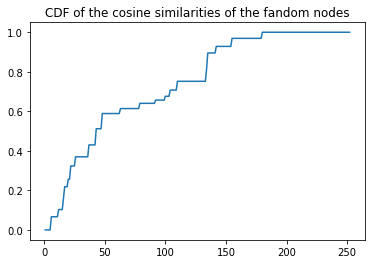

In [493]:
x_axis = []
y_axis = [0]
for i, j in enumerate(lst, 1):
  y_axis.append(y_axis[-1] + j)
  x_axis.append(i)
y_axis.pop(0)
n = sum(lst)
import matplotlib.pyplot as plt
y_axis = [i / n for i in y_axis]
plt.plot(x_axis, y_axis)
plt.title('CDF of the cosine similarities of the fandom nodes')
plt.show()

In [460]:
# 4 - 3)
sorted(g1.degree, key = lambda k : k[1], reverse = True)[:10]

[('jinseongho', 39),
 ('jbj', 35),
 ('kim', 27),
 ('leesoomin', 22),
 ('dongho', 21),
 ('leejunyoung', 21),
 ('woojinyoung', 21),
 ('jungsewoon', 19),
 ('ohmygirl', 18),
 ('chungha', 18)]

In [461]:
sorted(g2.degree, key = lambda k : k[1], reverse = True)[:10]

[('jbj', 40),
 ('kim', 40),
 ('jsh', 39),
 ('ohmygirl', 22),
 ('highlight', 21),
 ('dongho', 20),
 ('leejunyoung', 19),
 ('jungsewoon', 15),
 ('redvelvetreveluv', 15),
 ('mkyunghoon', 14)]

In [462]:
for i in sorted(g1.degree, key = lambda k : k[1], reverse = True)[:10]:
  print(i[0], g1.degree[i[0]],'->', g2.degree[i[0]])

jinseongho 39 -> 0
jbj 35 -> 40
kim 27 -> 40
leesoomin 22 -> 1
dongho 21 -> 20
leejunyoung 21 -> 19
woojinyoung 21 -> 1
jungsewoon 19 -> 15
ohmygirl 18 -> 22
chungha 18 -> 13


In [463]:
sorted(g1.out_degree, key = lambda k : k[1], reverse = True)[:10]

[('woojinyoung', 19),
 ('jbj', 16),
 ('ohmygirl', 15),
 ('jinseongho', 12),
 ('kim', 12),
 ('leesoomin', 10),
 ('chungha', 10),
 ('girllaboum', 9),
 ('jungsewoon', 9),
 ('leejunyoung', 8)]

In [464]:
sorted(g2.out_degree, key = lambda k : k[1], reverse = True)[:10]

[('jsh', 20),
 ('highlight', 18),
 ('jbj', 14),
 ('kim', 11),
 ('april', 11),
 ('redvelvetreveluv', 11),
 ('cosmicgirl', 10),
 ('gx9', 9),
 ('mkyunghoon', 9),
 ('infinite', 9)]

In [465]:
for i in sorted(g1.out_degree, key = lambda k : k[1], reverse = True)[:10]:
  print(i[0], g1.out_degree[i[0]],'->', g2.out_degree[i[0]])

woojinyoung 19 -> 1
jbj 16 -> 14
ohmygirl 15 -> 1
jinseongho 12 -> 0
kim 12 -> 11
leesoomin 10 -> 0
chungha 10 -> 5
girllaboum 9 -> 4
jungsewoon 9 -> 3
leejunyoung 8 -> 7


6

In [66]:
# pd.DataFrame(fandom_meta['agent'].value_counts())
year_df = pd.DataFrame(fandom_meta['year(debut)'].value_counts())
year_df

,year(debut)
2018,75
2017,75
2016,38
2015,29
2014,25
2012,19
2007,10
2013,9
2008,7
2011,7


In [92]:
데뷔_2017 = 데뷔_2010s = 데뷔_2000s = 데뷔_1990s = 0
total = 0
for i in range(1990, 2019):
  try:
    cnt = year_df.loc[i].values[0]
    total += cnt
    if i < 2000:
      데뷔_1990s += cnt
    elif i < 2010:
      데뷔_2000s += cnt
    elif i < 2017:
      데뷔_2010s += cnt
    else:
      데뷔_2017 += cnt
  except:
    pass
print(데뷔_2017, 데뷔_2010s, 데뷔_2000s, 데뷔_1990s, total)

150 132 34 14 330


In [93]:
print(f"{데뷔_2017 / total * 100:.2f}%, {데뷔_2010s / total * 100:.2f}%, {데뷔_2000s / total * 100:.2f}%, {데뷔_1990s / total * 100:.2f}%, {total}")

45.45%, 40.00%, 10.30%, 4.24%, 330


In [95]:
g1.edges.data()

OutEdgeDataView([('binhjleehjh', 'dongho', {'weight': 163}), ('binhjleehjh', 'jungsewoon', {'weight': 149}), ('binhjleehjh', 'winkgall', {'weight': 138}), ('buzz', 'mkyunghoon', {'weight': 155}), ('cmg', 'jinseongho', {'weight': 206}), ('dmlwlsska', 'jaejoong', {'weight': 150}), ('dmlwlsska', 'kimjaehwan', {'weight': 150}), ('dmlwlsska', 'leesoomin', {'weight': 186}), ('doitamazing7', 'dongho', {'weight': 245}), ('doitamazing7', 'jbj', {'weight': 144}), ('doitamazing7', 'kim', {'weight': 159}), ('doitamazing7', 'leejunyoung', {'weight': 241}), ('doitamazing7', 'leesoomin', {'weight': 185}), ('doitamazing7', 'vikon', {'weight': 150}), ('dongho', 'girllaboum', {'weight': 155}), ('dongho', 'jinseongho', {'weight': 220}), ('girllaboum', 'dongho', {'weight': 296}), ('girllaboum', 'hotshot', {'weight': 188}), ('girllaboum', 'jaejoong', {'weight': 164}), ('girllaboum', 'kim', {'weight': 187}), ('girllaboum', 'leejunyoung', {'weight': 401}), ('girllaboum', 'leesoomin', {'weight': 218}), ('girl

In [96]:
g1.edges.data()

OutEdgeDataView([('binhjleehjh', 'dongho', {'weight': 163}), ('binhjleehjh', 'jungsewoon', {'weight': 149}), ('binhjleehjh', 'winkgall', {'weight': 138}), ('buzz', 'mkyunghoon', {'weight': 155}), ('cmg', 'jinseongho', {'weight': 206}), ('dmlwlsska', 'jaejoong', {'weight': 150}), ('dmlwlsska', 'kimjaehwan', {'weight': 150}), ('dmlwlsska', 'leesoomin', {'weight': 186}), ('doitamazing7', 'dongho', {'weight': 245}), ('doitamazing7', 'jbj', {'weight': 144}), ('doitamazing7', 'kim', {'weight': 159}), ('doitamazing7', 'leejunyoung', {'weight': 241}), ('doitamazing7', 'leesoomin', {'weight': 185}), ('doitamazing7', 'vikon', {'weight': 150}), ('dongho', 'girllaboum', {'weight': 155}), ('dongho', 'jinseongho', {'weight': 220}), ('girllaboum', 'dongho', {'weight': 296}), ('girllaboum', 'hotshot', {'weight': 188}), ('girllaboum', 'jaejoong', {'weight': 164}), ('girllaboum', 'kim', {'weight': 187}), ('girllaboum', 'leejunyoung', {'weight': 401}), ('girllaboum', 'leesoomin', {'weight': 218}), ('girl

In [112]:
dic = {}
for i in g1.edges.data():
  from_year = fandom_meta[fandom_meta['fandom_name'] == i[0]]['year(debut)'].values[0]
  to_year = fandom_meta[fandom_meta['fandom_name'] == i[1]]['year(debut)'].values[0]
  if from_year < 2000:
    a = '데뷔_1990s'
  elif from_year < 2010:
    a = '데뷔_2000s'
  elif from_year < 2017:
    a = '데뷔_2010s'
  else:
    a = '데뷔_2017'

  if to_year < 2000:
    b = '데뷔_1990s'
  elif to_year < 2010:
    b = '데뷔_2000s'
  elif to_year < 2017:
    b = '데뷔_2010s'
  else:
    b = '데뷔_2017'
  dic[(a, b)] = dic.get((a, b), 0) + i[2]['weight']
dic

{('데뷔_2000s', '데뷔_2000s'): 155,
 ('데뷔_2000s', '데뷔_2010s'): 1068,
 ('데뷔_2000s', '데뷔_2017'): 292,
 ('데뷔_2010s', '데뷔_2000s'): 954,
 ('데뷔_2010s', '데뷔_2010s'): 15693,
 ('데뷔_2010s', '데뷔_2017'): 10270,
 ('데뷔_2017', '데뷔_2000s'): 1617,
 ('데뷔_2017', '데뷔_2010s'): 6619,
 ('데뷔_2017', '데뷔_2017'): 11425}

In [113]:
print("1월")
print("  ('from_year',  'to_year'), sum_of_weight")
sorted(dic.items(), key=lambda k : k[1], reverse=True)

1월
  ('from_year',  'to_year'), sum_of_weight


[(('데뷔_2010s', '데뷔_2010s'), 15693),
 (('데뷔_2017', '데뷔_2017'), 11425),
 (('데뷔_2010s', '데뷔_2017'), 10270),
 (('데뷔_2017', '데뷔_2010s'), 6619),
 (('데뷔_2017', '데뷔_2000s'), 1617),
 (('데뷔_2000s', '데뷔_2010s'), 1068),
 (('데뷔_2010s', '데뷔_2000s'), 954),
 (('데뷔_2000s', '데뷔_2017'), 292),
 (('데뷔_2000s', '데뷔_2000s'), 155)]

In [115]:
dic = {}
for i in g2.edges.data():
  from_year = fandom_meta[fandom_meta['fandom_name'] == i[0]]['year(debut)'].values[0]
  to_year = fandom_meta[fandom_meta['fandom_name'] == i[1]]['year(debut)'].values[0]
  if from_year < 2000:
    a = '데뷔_1990s'
  elif from_year < 2010:
    a = '데뷔_2000s'
  elif from_year < 2017:
    a = '데뷔_2010s'
  else:
    a = '데뷔_2017'

  if to_year < 2000:
    b = '데뷔_1990s'
  elif to_year < 2010:
    b = '데뷔_2000s'
  elif to_year < 2017:
    b = '데뷔_2010s'
  else:
    b = '데뷔_2017'
  dic[(a, b)] = dic.get((a, b), 0) + i[2]['weight']
dic

{('데뷔_1990s', '데뷔_2010s'): 90,
 ('데뷔_1990s', '데뷔_2017'): 99,
 ('데뷔_2000s', '데뷔_1990s'): 137,
 ('데뷔_2000s', '데뷔_2000s'): 228,
 ('데뷔_2000s', '데뷔_2010s'): 949,
 ('데뷔_2000s', '데뷔_2017'): 1160,
 ('데뷔_2010s', '데뷔_1990s'): 108,
 ('데뷔_2010s', '데뷔_2000s'): 450,
 ('데뷔_2010s', '데뷔_2010s'): 10507,
 ('데뷔_2010s', '데뷔_2017'): 6353,
 ('데뷔_2017', '데뷔_2010s'): 5386,
 ('데뷔_2017', '데뷔_2017'): 4371}

In [116]:
print("2월")
print("  ('from_year',  'to_year'), sum_of_weight")
sorted(dic.items(), key=lambda k : k[1], reverse=True)

2월
  ('from_year',  'to_year'), sum_of_weight


[(('데뷔_2010s', '데뷔_2010s'), 10507),
 (('데뷔_2010s', '데뷔_2017'), 6353),
 (('데뷔_2017', '데뷔_2010s'), 5386),
 (('데뷔_2017', '데뷔_2017'), 4371),
 (('데뷔_2000s', '데뷔_2017'), 1160),
 (('데뷔_2000s', '데뷔_2010s'), 949),
 (('데뷔_2010s', '데뷔_2000s'), 450),
 (('데뷔_2000s', '데뷔_2000s'), 228),
 (('데뷔_2000s', '데뷔_1990s'), 137),
 (('데뷔_2010s', '데뷔_1990s'), 108),
 (('데뷔_1990s', '데뷔_2017'), 99),
 (('데뷔_1990s', '데뷔_2010s'), 90)]